# ML Exercise 1 - Eucalyptus

In [2]:
# imports
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io.arff import loadarff

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

## Exploratory Data Analysis

In [68]:
# Load learn data
raw_data = loadarff("dataset_194_eucalyptus.arff");
df = pd.DataFrame(raw_data[0])

In [69]:
df.head()

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'co',1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5,b'good'
1,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'fr',1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0,b'best'
2,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'ma',1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0,b'low'
3,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'nd',1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5,b'good'
4,b'Cra',1.0,b'Central_Hawkes_Bay',b'N135_382/137',b'39__38',100.0,850.0,-2.0,1980.0,b'ni',2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0,b'good'


In [70]:
# 736 instances, 20 features
df.shape

(736, 20)

In [71]:
# check for duplicates
len(df.drop_duplicates())

736

-> no duplicates

In [72]:
# we have some instances with missing values
df.isna().sum()

Abbrev       0
Rep          0
Locality     0
Map_Ref      0
Latitude     0
Altitude     0
Rainfall     0
Frosts       0
Year         0
Sp           0
PMCno        7
DBH          1
Ht           1
Surv        94
Vig         69
Ins_res     69
Stem_Fm     69
Crown_Fm    69
Brnch_Fm    69
Utility      0
dtype: int64

In [73]:
uniq_classes = df['Utility'].unique()

print(uniq_classes)
print("\nNumber of unique classes: ", len(uniq_classes))

[b'good' b'best' b'low' b'average' b'none']

Number of unique classes:  5


In [74]:
#count unique values in each column
df.nunique()

Abbrev       16
Rep           4
Locality      8
Map_Ref      14
Latitude     12
Altitude      9
Rainfall     10
Frosts        2
Year          5
Sp           27
PMCno        85
DBH         603
Ht          531
Surv         47
Vig          33
Ins_res      28
Stem_Fm      26
Crown_Fm     29
Brnch_Fm     28
Utility       5
dtype: int64

Statistics:

- number of instances: 736
- number of features: 20
- number of classes: 5
- number of missing values: 448
- number of instances with missing values: 95
- number of numeric features: 14
- number of symbolic features: 6

Dataset contains numeric and nominal data types.

C:\Users\stefa\AppData\Local\Temp\ipykernel_14116\2225569098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14116\2225569098.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot: >

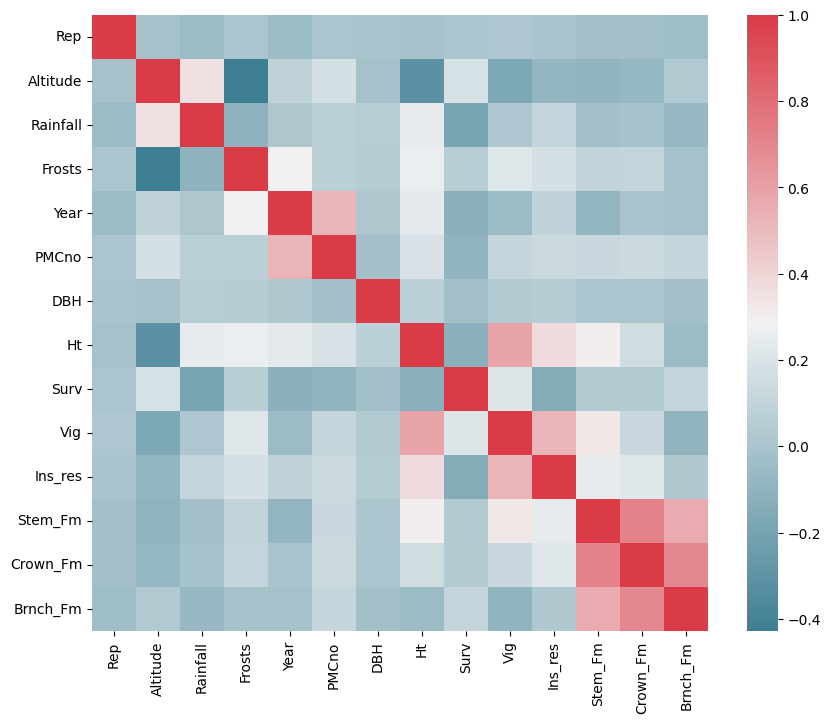

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

b'good'       214
b'none'       180
b'average'    130
b'low'        107
b'best'       105
Name: Utility, dtype: int64

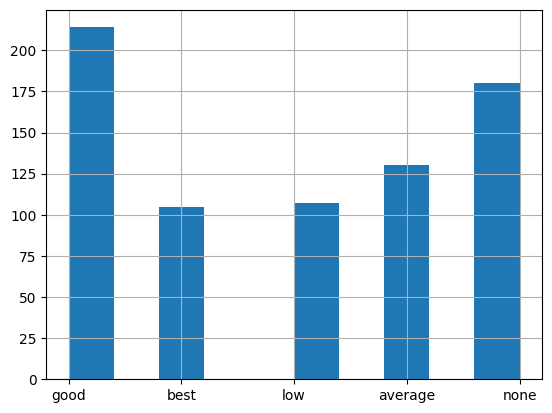

In [76]:
# check class distribution
df['Utility'].hist()

df['Utility'].value_counts()

## Preprocessing

In [184]:
# import libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [185]:
nominal_features = ["Abbrev", "Locality", "Map_Ref", "Latitude", "Sp"]
numeric_features = ["Rep", "Altitude", "Rainfall", "Frosts", "Year", "PMCno", "DBH", 
                    "Ht", "Surv", "Vig", "Ins_res", "Stem_Fm", "Crown_Fm", "Brnch_Fm"]

In [186]:
df = pd.DataFrame(raw_data[0])

#### Impute missing values

In [187]:
df_imp = df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric_columns = df_imp.select_dtypes(include='number').columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imp[numeric_columns] = pd.DataFrame(imp.fit_transform(df_imp[numeric_columns]), columns=numeric_columns)

#### Drop instances with missing values

In [188]:
df = df.dropna()

# 736 -> 641 instances
df.shape

(641, 20)

In [189]:
df_imp.shape

(736, 20)

<AxesSubplot: >

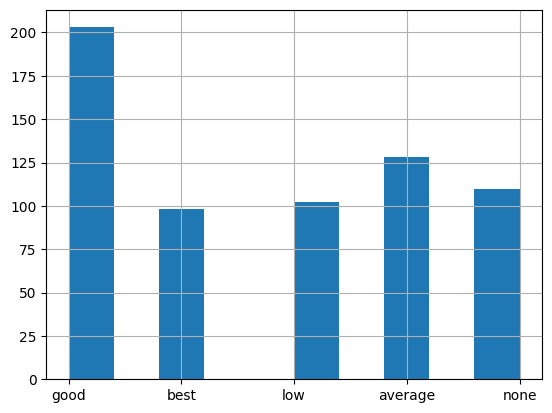

In [174]:
# class distribution after dropping NA
df['Utility'].hist()

<AxesSubplot: >

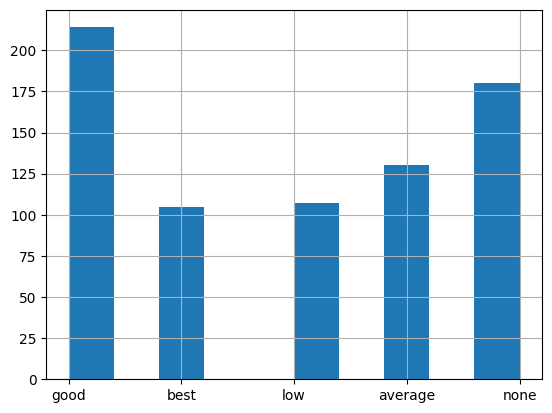

In [175]:
df_imp['Utility'].hist()

#### Split features and labels

In [190]:
X = df.drop(columns=['Utility'])
y = df['Utility']

X_imp = df_imp.drop(columns=['Utility'])
y_imp = df_imp['Utility']

#### Encoding

In [191]:
# transform all nominal features using one-hot encoding technique
one_hot = pd.get_dummies(X[nominal_features])
X = X.drop(columns=nominal_features).join(one_hot)

one_hot_imp = pd.get_dummies(X_imp[nominal_features])
X_imp = X_imp.drop(columns=nominal_features).join(one_hot_imp)

In [192]:
# also transform target calss values using 1hot encoding because it is multi-class prediction
y = pd.get_dummies(y).to_numpy()
y_imp = pd.get_dummies(y_imp).to_numpy()

In [193]:
X.shape

(641, 78)

In [194]:
X_imp.shape

(736, 91)

#### Split train and test data

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scaling

In [62]:
sc = StandardScaler()
mms = MinMaxScaler()
rs = RobustScaler()

do scaling of numeric values

it is also recommended to do scaling before using PCA

Also scaling is needed for the algorithms relying on distance (kNN)

In [ ]:
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [63]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
# X_train = rs.fit_transform(X_train)
# X_test = rs.transform(X_test)

#### PCA

Do data scaling before applying PCA

In [28]:
scalers = [None, StandardScaler(), MinMaxScaler(), RobustScaler()]
n_comp = 50

def show_pca_plots(X_pca, y_pca):
    for scaler in scalers:
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)

        if scaler != None:
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        pca = PCA(n_components=n_comp)

        # fit only train data
        pca.fit(X_train)

        pc_values = np.arange(pca.n_components_) + 1

        plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
        plt.title('Scree Plot - ' + str(scaler))
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained')
        plt.show()

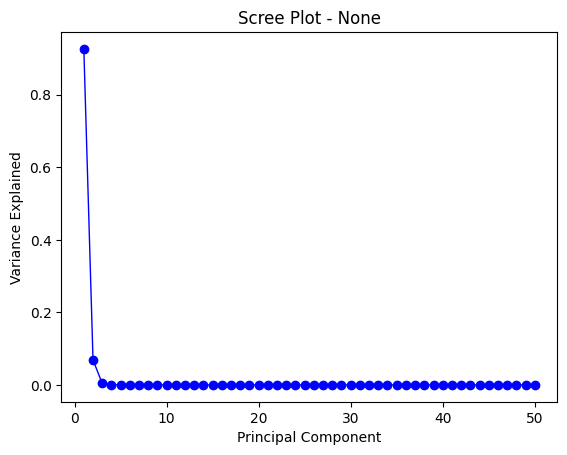

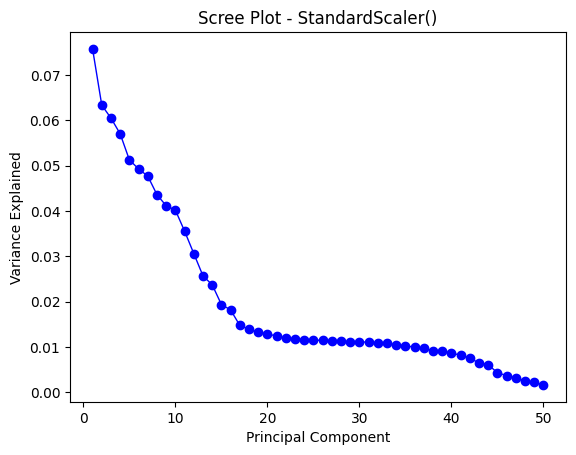

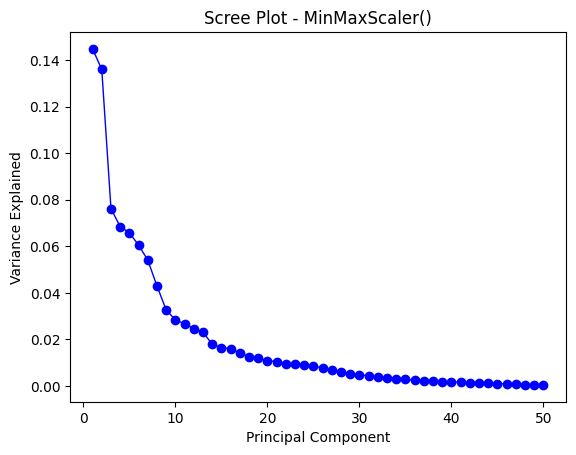

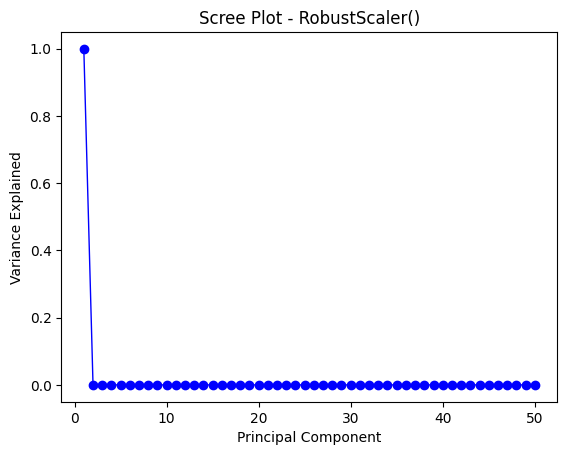

In [47]:
show_pca_plots(X_train, y_train)

-> From plots it can be seen that reducing the dimensionality may remove features that bring some value. Therefore it won't be used

## Model Development

Do hypterparameter tuning on different classifiers using randomized search CV algorithm in order to find best model parameters

In [64]:
# import libraries from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

#### KNN

In [65]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn_search = RandomizedSearchCV(knn, knn_params, n_iter=7, scoring='accuracy', cv=5, random_state=1)
knn_result = knn_search.fit(X_train, y_train)

print('[KNN] Best Score: %s' % knn_result.best_score_)
print('[KNN] Best Hyperparameters: %s' % knn_result.best_params_)

y_pred = knn_search.predict(X_test)

print("[KNN] Accurracy: ", accuracy_score(y_test, y_pred))

[KNN] Best Score: 0.45242718446601937
[KNN] Best Hyperparameters: {'n_neighbors': 3}
[KNN] Accurracy:  0.42081447963800905


#### Random Forest

In [66]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 125, 150, 175, 200, 250, 300, 350],
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=8, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
rf_result = rf_search.fit(X_train, y_train)

print('[RF] Best Score: %s' % rf_result.best_score_)
print('[RF] Best Hyperparameters: %s' % rf_result.best_params_)

y_pred = rf_search.predict(X_test)

print("[RF] Accurracy: ", accuracy_score(y_test, y_pred))

[RF] Best Score: 0.48543689320388345
[RF] Best Hyperparameters: {'n_estimators': 125}
[RF] Accurracy:  0.46153846153846156


Text(0.5, 1.0, 'Importance of attributes in RF Classifier')

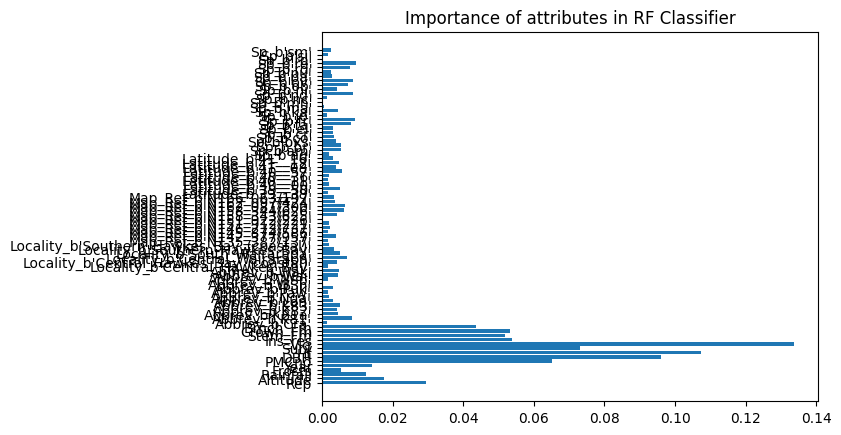

In [183]:
# creating the rf model, to plot the importance of attributes

model = RandomForestClassifier(n_estimators=125)
model.fit(X_train, y_train)

plt.barh(X.columns, model.feature_importances_)
plt.rcParams["figure.figsize"] = (60,30)
plt.title("Importance of attributes in RF Classifier")

#### MLP

In [67]:
mlp = MLPClassifier()

mlp_params = {
    'hidden_layer_sizes': [(400, 200), (300, 150), (200, 100), (400), (300), (200), (100)],
    'alpha': [0.0001, 0.0002, 0.0003],
    'learning_rate_init': [0.001, 0.002, 0.003],
    'max_iter': [1000],
    'activation' : ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs']
}

mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
mlp_result = mlp_search.fit(X_train, y_train)

print('[MLP] Best Score: %s' % mlp_result.best_score_)
print('[MLP] Best Hyperparameters: %s' % mlp_result.best_params_)

y_pred = mlp_search.predict(X_test)

print("[MLP] Accurracy: ", accuracy_score(y_test, y_pred))

[MLP] Best Score: 0.5980582524271844
[MLP] Best Hyperparameters: {'solver': 'lbfgs', 'max_iter': 1000, 'learning_rate_init': 0.003, 'hidden_layer_sizes': (200, 100), 'alpha': 0.0003, 'activation': 'logistic'}
[MLP] Accurracy:  0.5656108597285068


## Model Comparison

In [195]:
# impor libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [199]:
cols = ["algorithm", "scaler", "val", "accuracy", "precision", "recall", "f1", "elapsed_time (sec)"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=125),
    MLPClassifier(solver='lbfgs',
                  hidden_layer_sizes=(200, 100),
                  activation='logistic',
                  alpha=0.0003,
                  learning_rate_init=0.003,
                  max_iter=1000)
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    None
]

validation = ['cv', 'holdout']


def do_comparison(data):
    for classifier in classifiers:
        for scaler in scalers:
            for validation_method in validation:
                steps = [
                    ('scaler', scaler),
                    ('reduce_dim', PCA()),
                    ('clf', classifier)
                ]

                pipeline = Pipeline(steps)
                algorithm = classifier

                if validation_method == 'holdout':
                    # --------------------------------
                    st = time.time()
                    # ------------
                    pipeline.fit(X_train, y_train)   
                    # ------------
                    et = time.time()
                    # --------------------------------

                    y_pred = pipeline.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
                    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                    elapsed_time = et - st

                    new_row = pd.DataFrame({
                        "algorithm": str(algorithm),
                        "scaler": str(scaler),
                        "val": 'holdout',
                        "accuracy": accuracy,
                        "precision":precision,
                        "recall":recall,
                        "f1": f1,
                        "elapsed_time (sec)": elapsed_time}, index=[0])

                    data = pd.concat([new_row, data.loc[:]]).reset_index(drop=True)

                elif validation_method == 'cv':
                    # --------------------------------
                    st = time.time()
                    # ------------
                    accuracy_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
                    # ------------
                    et = time.time()
                    # --------------------------------

                    elapsed_time = et - st

                    precision_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(precision_score, average='macro', zero_division=0))
                    recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(recall_score, average='macro', zero_division=0))
                    f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring=make_scorer(f1_score, average='macro', zero_division=0))

                    new_row = pd.DataFrame({
                        "algorithm": str(algorithm),
                        "scaler": str(scaler),
                        "val": 'cv',
                        "accuracy": accuracy_scores.mean(),
                        "precision":precision_scores.mean(),
                        "recall":recall_scores.mean(),
                        "f1": f1_scores.mean(),
                        "elapsed_time (sec)": elapsed_time}, index=[0])

                    data = pd.concat([new_row, data.loc[:]]).reset_index(drop=True)
    return data

In [200]:
# without imputing
results = pd.DataFrame(columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
results = do_comparison(results)

D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

In [201]:
# sort results by accuracy
results.sort_values(by="accuracy", ascending=False)

,algorithm,scaler,val,accuracy,precision,recall,f1,elapsed_time (sec)
4,"MLPClassifier(activation='logistic', alpha=0.0...",MinMaxScaler(),holdout,0.554404,0.579952,0.546174,0.557415,3.443190
6,"MLPClassifier(activation='logistic', alpha=0.0...",StandardScaler(),holdout,0.554404,0.584727,0.545899,0.562271,1.949387
2,"MLPClassifier(activation='logistic', alpha=0.0...",RobustScaler(),holdout,0.497409,0.559334,0.528332,0.541053,16.960771
3,"MLPClassifier(activation='logistic', alpha=0.0...",RobustScaler(),cv,0.489850,0.516199,0.525264,0.477928,27.814747
18,KNeighborsClassifier(n_neighbors=3),RobustScaler(),holdout,0.487047,0.539653,0.460388,0.493109,0.046977
7,"MLPClassifier(activation='logistic', alpha=0.0...",StandardScaler(),cv,0.461761,0.472057,0.475244,0.446948,9.938876
5,"MLPClassifier(activation='logistic', alpha=0.0...",MinMaxScaler(),cv,0.461749,0.523533,0.502935,0.478216,20.295217
20,KNeighborsClassifier(n_neighbors=3),MinMaxScaler(),holdout,0.419689,0.480593,0.376642,0.414410,0.032000
22,KNeighborsClassifier(n_neighbors=3),StandardScaler(),holdout,0.393782,0.473327,0.351508,0.397971,0.035087
19,KNeighborsClassifier(n_neighbors=3),RobustScaler(),cv,0.358818,0.407599,0.330885,0.344816,0.336643


In [202]:
# with imputing
results_imp = pd.DataFrame(columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y_imp, test_size=0.3, random_state=42)
results_imp = do_comparison(results_imp)

D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\TU Wien\Semester 3\ML\Assignement 1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

In [203]:
# sort results by accuracy
results_imp.sort_values(by="accuracy", ascending=False)

,algorithm,scaler,val,accuracy,precision,recall,f1,elapsed_time (sec)
6,"MLPClassifier(activation='logistic', alpha=0.0...",StandardScaler(),holdout,0.597285,0.604818,0.576986,0.590181,2.162776
2,"MLPClassifier(activation='logistic', alpha=0.0...",RobustScaler(),holdout,0.561086,0.568323,0.558782,0.562833,3.980093
4,"MLPClassifier(activation='logistic', alpha=0.0...",MinMaxScaler(),holdout,0.556561,0.582382,0.572911,0.577019,2.879056
5,"MLPClassifier(activation='logistic', alpha=0.0...",MinMaxScaler(),cv,0.517793,0.543419,0.525082,0.513241,21.625387
3,"MLPClassifier(activation='logistic', alpha=0.0...",RobustScaler(),cv,0.499176,0.530507,0.489413,0.503367,39.266990
7,"MLPClassifier(activation='logistic', alpha=0.0...",StandardScaler(),cv,0.488239,0.521279,0.482412,0.473255,10.356182
18,KNeighborsClassifier(n_neighbors=3),RobustScaler(),holdout,0.457014,0.485175,0.393294,0.426661,0.053975
22,KNeighborsClassifier(n_neighbors=3),StandardScaler(),holdout,0.420814,0.482975,0.390741,0.428344,0.045994
20,KNeighborsClassifier(n_neighbors=3),MinMaxScaler(),holdout,0.420814,0.490351,0.381717,0.426868,0.043975
16,KNeighborsClassifier(n_neighbors=3),None,holdout,0.416290,0.487959,0.376376,0.422901,0.041970
